In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as plt_colors
import pandas as pd
import pandas.plotting as pd_plt
from IPython.display import display

<h1>Метод t-SNE</h1>

Алгоритм t-SNE, создает новое представление обучающих данных, но при этом не осуществляют преобразования новых данных. Это означает, что данные алгоритмы нельзя применить к тестовому набору, они могут преобразовать лишь те данные, на которых они были обучены.

Идея, лежащая в основе алгоритма t-SNE, заключается в том, чтобы найти двумерное представление данных, сохраняющее расстояния между точками наилучшим образом. t-SNE начинает свою работу со случайного двумерного представления каждой точки данных, а затем пытается сблизить точки, которые в пространстве исходных признаков находятся близко друг к другу, и отдаляет друг от друга точки, которые находятся далеко друг от друга. При этом t-SNE уделяет большее внимание сохранению расстояний между точками, близко расположенными друг к другу. Иными словами, он пытается сохранить информацию, указывающую на то, какие точки являются соседями друг другу. 

Можно сказать с очень большими допущениями, что данный алгоритм имеет «гравитационную» природу – близкие объекты «группируются», дальние объекты группируются у других точек притяжения.

Посмотрите демонстрацию работу алгоритма, для лучшего понимания принципа работы алгоритма
https://distill.pub/2016/misread-tsne/

Можно почитать больше теории здесь https://habr.com/ru/post/267041/


### Пример с цифрами

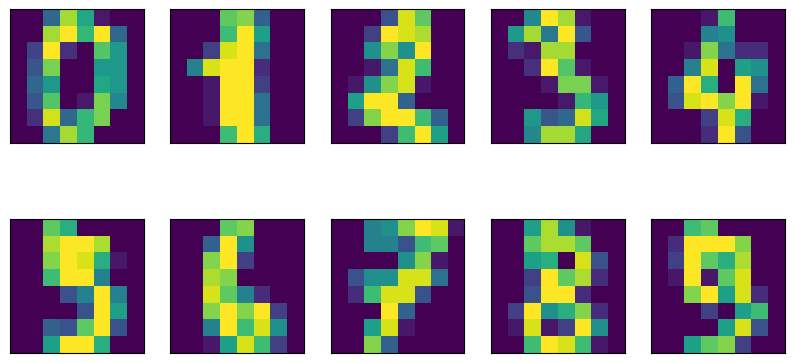

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

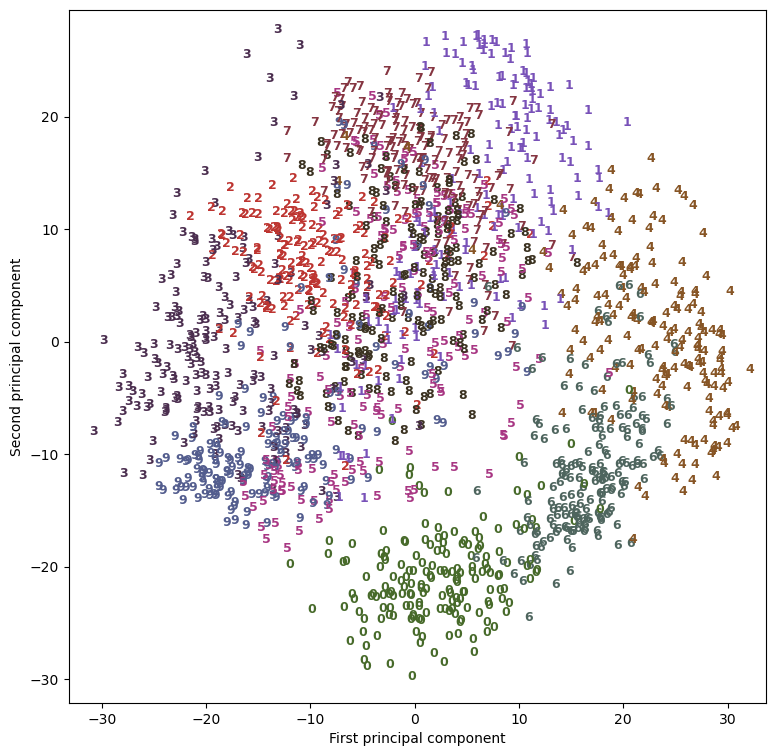

In [11]:
# Попробуем использовать PCA для проектирования на плоскость
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(9, 9))
plt.xlim(digits_pca[:, 0].min()-2, digits_pca[:, 0].max()+2)
plt.ylim(digits_pca[:, 1].min()-2, digits_pca[:, 1].max()+2)
for i in range(len(digits.data)):
    
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component");
plt.ylabel("Second principal component");

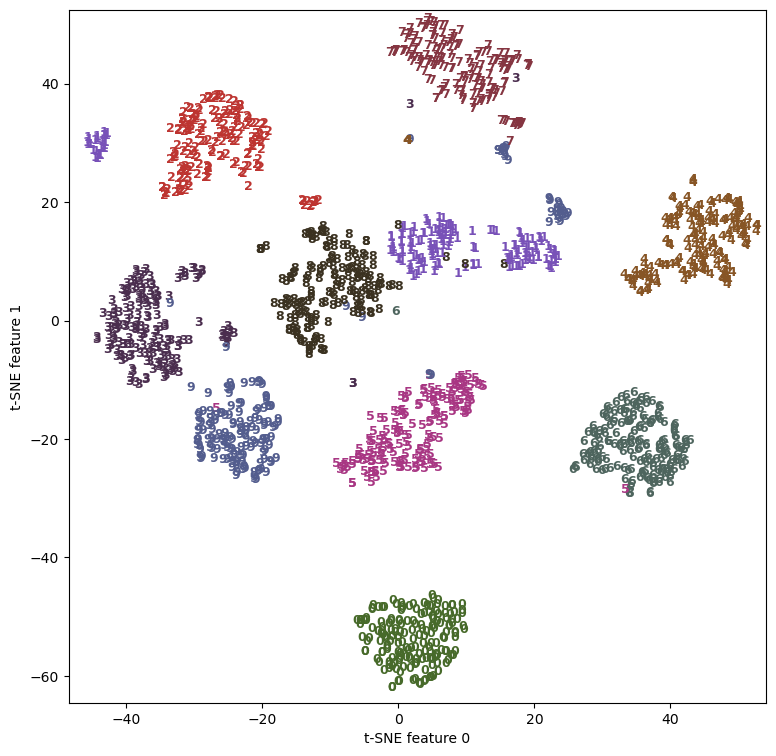

In [12]:
# Попробуем t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42, n_jobs=-1)

digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(9, 9))
plt.xlim(digits_tsne[:, 0].min()-2, digits_tsne[:, 0].max() + 2)
plt.ylim(digits_tsne[:, 1].min()-2, digits_tsne[:, 1].max() + 2)
for i in range(len(digits.data)):
    
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0");
plt.ylabel("t-SNE feature 1");

### Пример с реальными многомерными данными

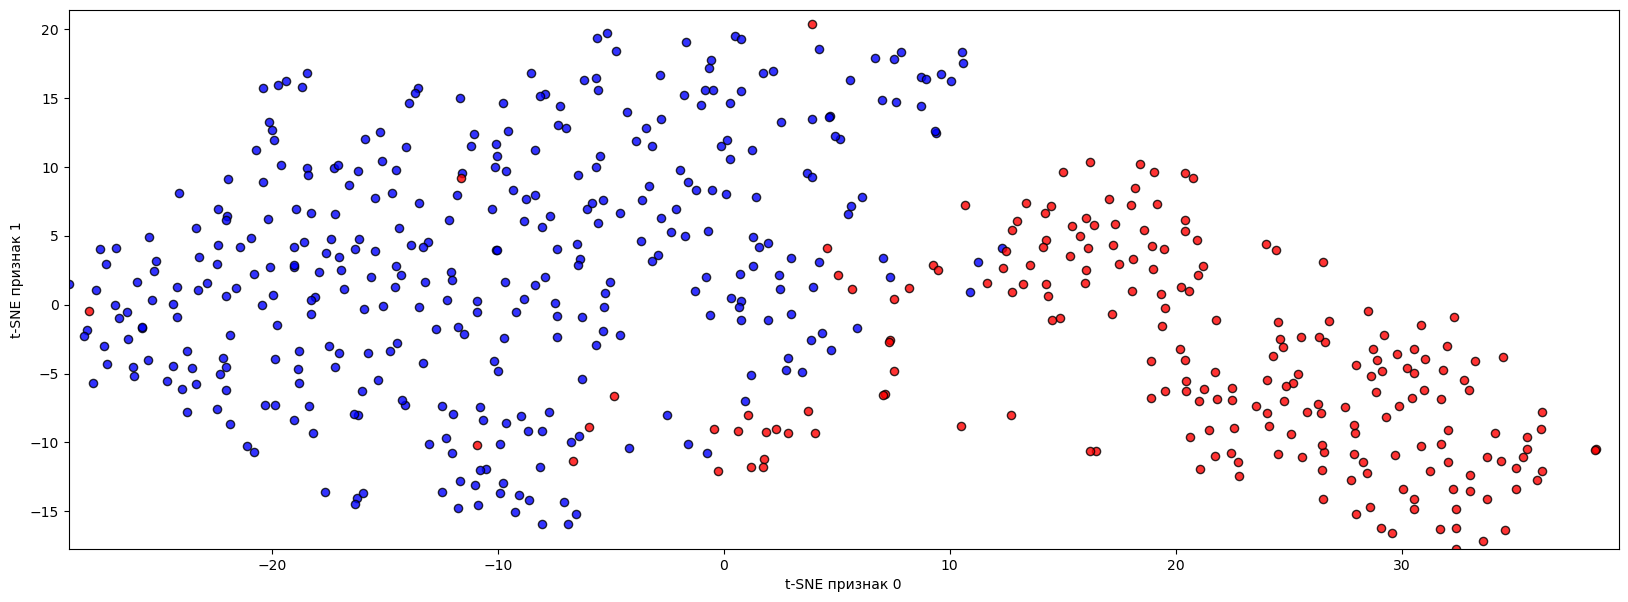

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

cancer = load_breast_cancer()
scaler = StandardScaler() 

scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

tsne = TSNE(random_state=2)
model_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(20, 7))
colors = ["red", "blue"]
plt.xlim(model_tsne[:, 0].min(), model_tsne[:, 0].max() + 1) 
plt.ylim(model_tsne[:, 1].min(), model_tsne[:, 1].max() + 1) 
for i in range(len(cancer.data)):                                     
    plt.scatter(model_tsne[i, 0], model_tsne[i, 1], 
            marker='o',
            s=35, 
            edgecolor='k', 
            alpha=.8, 
            color = colors[cancer.target[i]]) 
plt.xlabel("t-SNE признак 0")
plt.ylabel("t-SNE признак 1")
plt.show()

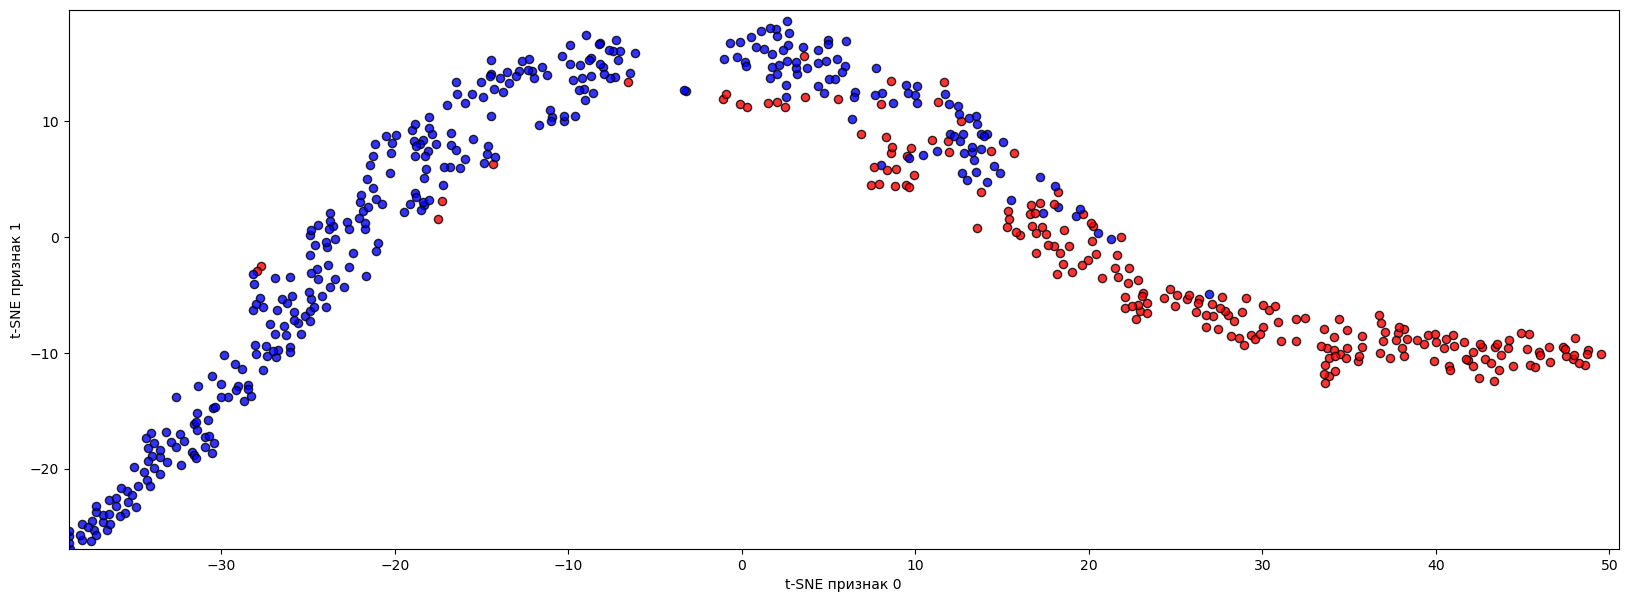

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

cancer = load_breast_cancer()

tsne = TSNE(random_state=42, n_jobs=-1)
model_tsne = tsne.fit_transform(cancer.data)

plt.figure(figsize=(20, 7))
colors = ["red", "blue"]
plt.xlim(model_tsne[:, 0].min(), model_tsne[:, 0].max() + 1) 
plt.ylim(model_tsne[:, 1].min(), model_tsne[:, 1].max() + 1) 
for i in range(len(cancer.data)):                                     
    plt.scatter(model_tsne[i, 0], model_tsne[i, 1], 
            marker='o',
            s=35, 
            edgecolor='k', 
            alpha=.8, 
            color = colors[cancer.target[i]]) 
plt.xlabel("t-SNE признак 0")
plt.ylabel("t-SNE признак 1")
plt.show()

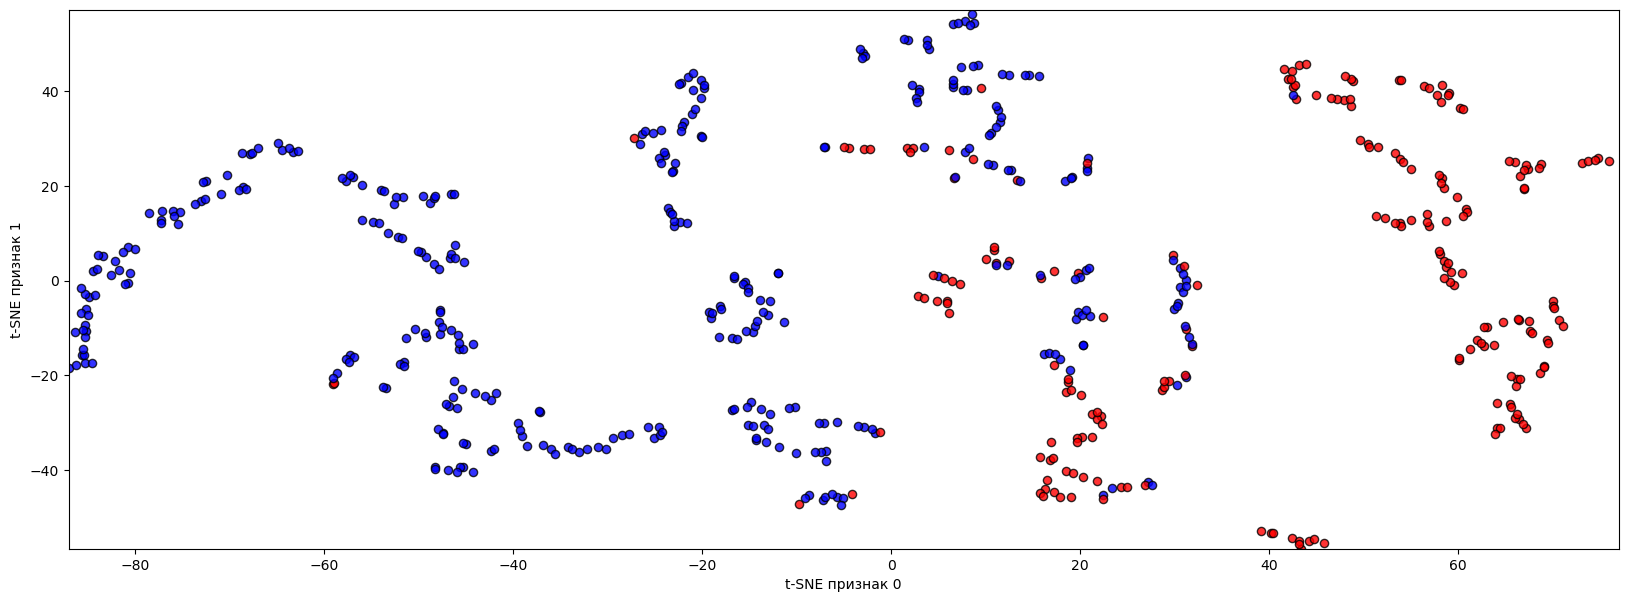

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

cancer = load_breast_cancer()

tsne = TSNE(random_state=42, n_jobs=-1, perplexity=5)
model_tsne = tsne.fit_transform(cancer.data)

plt.figure(figsize=(20, 7))
colors = ["red", "blue"]
plt.xlim(model_tsne[:, 0].min(), model_tsne[:, 0].max() + 1) 
plt.ylim(model_tsne[:, 1].min(), model_tsne[:, 1].max() + 1) 
for i in range(len(cancer.data)):
    #              ,                                              
    plt.scatter(model_tsne[i, 0], model_tsne[i, 1], 
            marker='o',
            s=35, 
            edgecolor='k', 
            alpha=.8, 
            color = colors[cancer.target[i]]
            ) 
plt.xlabel("t-SNE признак 0")
plt.ylabel("t-SNE признак 1")
plt.show()

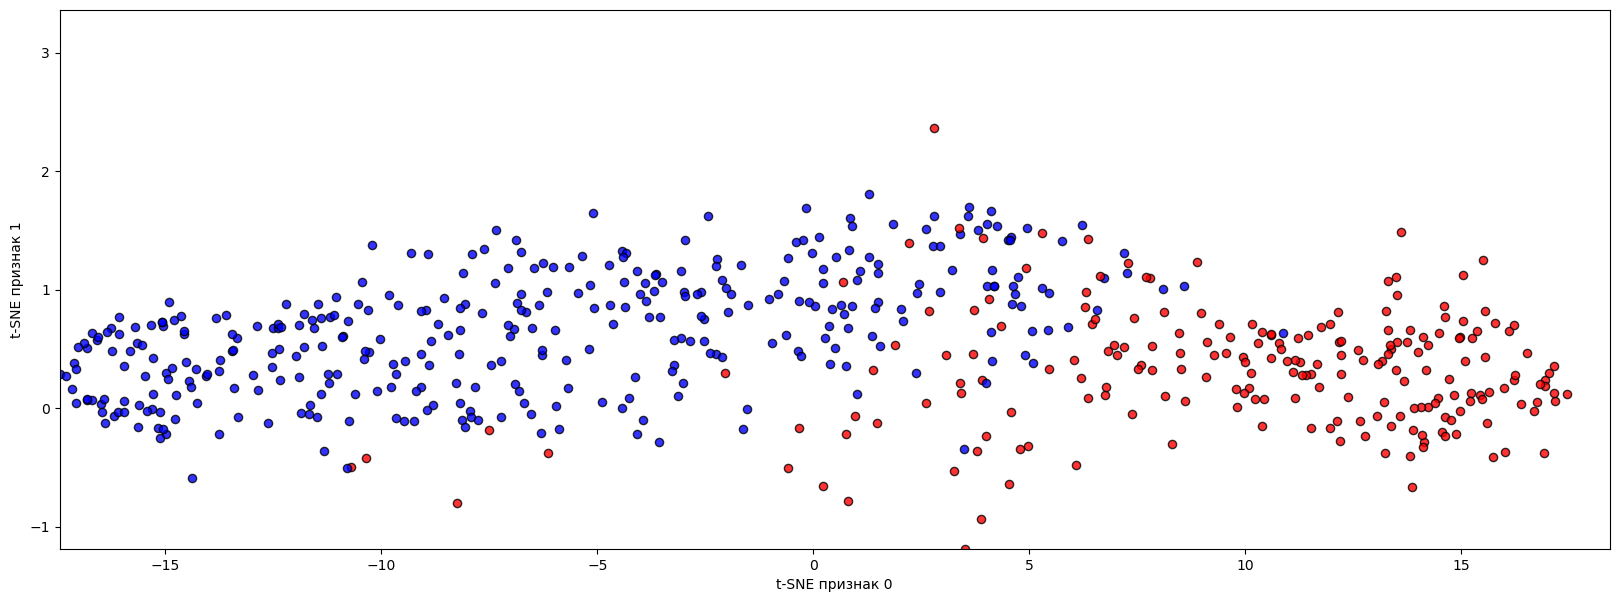

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

cancer = load_breast_cancer()

tsne = TSNE(random_state=42, n_jobs=-1, perplexity=100)
model_fit=tsne.fit(cancer.data)
model_tsne = tsne.fit_transform(cancer.data)

plt.figure(figsize=(20, 7))
colors = ["red", "blue"]
plt.xlim(model_tsne[:, 0].min(), model_tsne[:, 0].max() + 1) 
plt.ylim(model_tsne[:, 1].min(), model_tsne[:, 1].max() + 1) 
for i in range(len(cancer.data)):
    #              ,                                              
    plt.scatter(model_tsne[i, 0], model_tsne[i, 1], 
            marker='o',
            s=35, 
            edgecolor='k', 
            alpha=.8, 
            color = colors[cancer.target[i]]
            ) 
plt.xlabel("t-SNE признак 0")
plt.ylabel("t-SNE признак 1")
plt.show()


Много интересного смотрим тут
https://distill.pub/2016/misread-tsne/